# FOPDT fit

My tests of my TClab around $Q_1=50$ have resulted FOPDT model with $\tau_p=150$ s, $K_p=0.38$ and $\theta=15$ s

In [61]:
from tclab import runexperiment

In [39]:
steptime=1000
Qbar = 50
deltaQ = 10

In [40]:
def steptest(t, lab):
    lab.Q1(Qbar if t < steptime else Qbar + deltaQ)

In [78]:
%matplotlib notebook

TCLab version 0.4.6dev
NHduino connected on port /dev/cu.wchusbserial1410 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Uno.


<IPython.core.display.Javascript object>


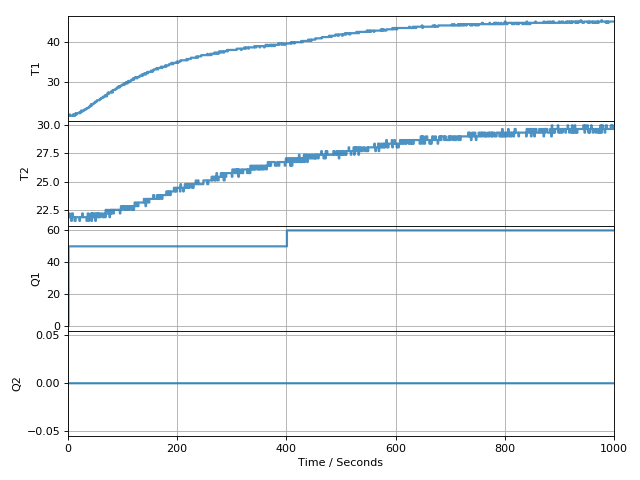

TCLab disconnected successfully.


In [79]:
experiment = runexperiment(steptest, connected=True, 
                           plot=True, twindow=1000,
                           time=1000, 
                           speedup=1,
                           dbfile='sinetest.db')

In [16]:
import numpy
from matplotlib import pyplot as plt

In [17]:
%matplotlib inline

In [21]:
# h = experiment.historian

In [19]:
from tclab import Historian

In [20]:
h = Historian(sources=(('Q1', lambda: [1, 2, 3, 4]), ('Q2', None), ('T1', None), ('T2', None)), dbfile='sinetest.db')

In [22]:
h.get_sessions()

[(2, '2018-03-06 18:45:27', 13710),
 (12, '2018-03-07 14:55:43', 2001),
 (15, '2018-03-07 18:43:39', 7526),
 (25, '2018-03-08 05:34:09', 5523),
 (27, '2018-03-08 07:10:23', 4873),
 (28, '2018-03-08 12:59:29', 55),
 (29, '2018-03-08 13:00:31', 116),
 (30, '2018-03-08 13:02:35', 1001),
 (31, '2018-03-08 13:25:17', 2001),
 (32, '2018-03-08 14:30:19', 0),
 (33, '2018-03-08 14:30:32', 891),
 (34, '2018-03-08 14:46:08', 536),
 (35, '2018-03-08 14:55:18', 132),
 (36, '2018-03-08 15:02:28', 2001),
 (37, '2018-03-09 04:37:56', 0),
 (38, '2018-03-09 04:39:17', 0)]

In [30]:
h.load_session(12)

In [62]:
tau_p = 150
K_p = 0.38
theta = 15

In [63]:
T1_0 = 43

In [64]:
t = numpy.array(h.t)

In [65]:
resp = numpy.maximum(deltaQ*K_p*(1 - numpy.exp(-(t - theta - steptime)/tau_p)), 0) + T1_0

(40, 48.603)

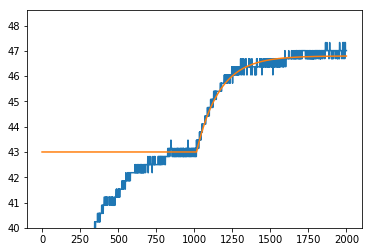

In [66]:
plt.figure()
plt.plot(h.t, h.logdict['T1'])
plt.plot(h.t, resp)
plt.ylim(ymin=40)